# Настраиваем окружение

In [64]:
from rich import print
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())


True

# Подключаем GigaChat

In [66]:

from langchain_gigachat import GigaChat

llm = GigaChat(model="GigaChat-2-Max", profanity_check=False, top_p=0)
print(llm.invoke("Кто тебя сделал?").content)

Меня создала компания Sber в России в 2023 году.

# Создаем ReAact агента с возможностью поиска в интернете

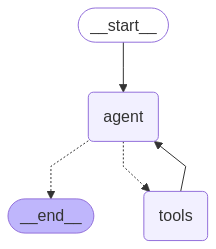

In [67]:
from langgraph.prebuilt import create_react_agent
from langchain_community.tools import DuckDuckGoSearchRun # !pip install duckduckgo_search

search_tool = DuckDuckGoSearchRun()

agent = create_react_agent(llm, tools=[search_tool], prompt="Ты полезный ассистент")
agent

In [68]:
inputs = {"messages": [("user", "Какая самая дорогая компания в мире на сегодня?")]}
messages = agent.invoke(inputs)['messages']

In [69]:
print(messages[-1].content)

На данный момент самой дорогой компанией в мире является **NVIDIA**, чья рыночная капитализация превышает **$3,6 
трлн**. Однако стоит учитывать, что такие рейтинги могут изменяться ежедневно из-за колебаний цен акций на бирже. 
Ранее лидерами были **Apple** и **Microsoft**, но сейчас они занимают второе и третье места соответственно. Рейтинг
регулярно обновляется, поэтому для получения актуальной информации рекомендуется проверять последние новости или 
специализированные финансовые ресурсы.

## Изучим лог работы агента
Видно, что агент сначала сделал вызов функции, затем LLM обработала результат поиска и потом подготовила итоговый ответ для пользователя.

In [70]:
print(messages)

[
    HumanMessage(
        content='Какая самая дорогая компания в мире на сегодня?',
        additional_kwargs={},
        response_metadata={},
        id='69467c28-85b6-4f8c-b851-fd3cd314f2df'
    ),
    AIMessage(
        content='',
        additional_kwargs={
            'function_call': {
                'name': 'duckduckgo_search',
                'arguments': {'query': 'самая дорогая компания в мире на сегодня'}
            },
            'functions_state_id': '3cc42bd9-000d-44a2-8b0a-59df2dee03cb'
        },
        response_metadata={
            'token_usage': {
                'prompt_tokens': 105,
                'completion_tokens': 35,
                'total_tokens': 140,
                'precached_prompt_tokens': 2
            },
            'model_name': 'GigaChat-2-Max:2.0.28.02',
            'x_headers': {
                'x-request-id': '6ff44bfa-0f16-45d3-9c6a-40f5013f6f0a',
                'x-session-id': '32438b1f-7928-4c16-a54a-d3bf3931ce0e',
                'x-client-id': None
            },
            'finish_reason': 'function_call'
        },
        id='6ff44bfa-0f16-45d3-9c6a-40f5013f6f0a',
        tool_calls=[
            {
                'name': 'duckduckgo_search',
                'args': {'query': 'самая дорогая компания в мире на сегодня'},
                'id': '27f2524e-983f-464f-8362-22803049f87b',
                'type': 'tool_call'
            }
        ],
        usage_metadata={
            'output_tokens': 35,
            'input_tokens': 105,
            'total_tokens': 140,
            'input_token_details': {'cache_read': 2}
        }
    ),
    ToolMessage(
        content='Собрали самые дорогие компании по рыночной капитализации. Не забывайте, что этот список постоянно 
обновляется - данные актуальны на декабрь 2024. 1. Apple Inc. (AAPL) Apple остаётся лидером, предлагая 
инновационные устройства и укрепляя свою экосистему продуктов. 2. NVIDIA Corporation (NVDA) Акции Nvidia на прошлой
неделе достигли рекордного максимума, сделав производителя чипов первой компанией в истории, чья стоимость на 
фондовом рынке превысила 3,6 триллиона долларов. Рассказываем о рейтинге самых дорогих компаний в мире, месте 
Nvidia в нем и объясняем, какие действия, технологии и чипы компании в сфере искусственного интеллекта на это 
повлияли В 2025 году самой дорогой компанией в мире является Apple с рыночной капитализацией в 3.548 трлн долларов 
. На втором месте - Microsoft ($3.085 трлн). Третье место занимает NVIDIA с капитализацией 2.940 трлн долларов. 
Далее мы рассмотрим рейтинг десяти крупнейших компаний в мире, отсортированных по рыночной капитализации. NVIDIA. 
Накануне акции Nvidia закрылись ростом на 2,84% на отметке $139,91 за штуку. В результате рыночная стоимость 
компании достигла $3,43 трлн. Капитализация производителя Iphone по итогам...',
        name='duckduckgo_search',
        id='c156b177-7e68-46a1-9537-425718468b51',
        tool_call_id='27f2524e-983f-464f-8362-22803049f87b'
    ),
    AIMessage(
        content='На данный момент самой дорогой компанией в мире является **NVIDIA**, чья рыночная капитализация 
превышает **$3,6 трлн**. Однако стоит учитывать, что такие рейтинги могут изменяться ежедневно из-за колебаний цен 
акций на бирже. Ранее лидерами были **Apple** и **Microsoft**, но сейчас они занимают второе и третье места 
соответственно. Рейтинг регулярно обновляется, поэтому для получения актуальной информации рекомендуется проверять 
последние новости или специализированные финансовые ресурсы.',
        additional_kwargs={'functions_state_id': '9205e0af-0b58-4620-8fe5-579a8a3b14d8'},
        response_metadata={
            'token_usage': {
                'prompt_tokens': 300,
                'completion_tokens': 92,
                'total_tokens': 392,
                'precached_prompt_tokens': 140
            },
            'model_name': 'GigaChat-2-Max:2.0.28.02',
            'x_headers': {
                'x-request-id': '72a9f523-e452-4664-b118-5a012209c999',


# Агент для заполнения LeanCanvas

## Structured output - наивный подход

In [13]:
from pydantic import BaseModel
from typing import Optional

class LeanCanvasResult(BaseModel):
    """
    Представляет результат генерации Lean Canvas.
    Каждое поле соответствует разделу Lean Canvas.
    """
    problem: str  # Проблема, которую пытается решить продукт или услуга.
    solution: str  # Краткое описание предлагаемого решения.
    key_metrics: str  # Ключевые показатели, которые необходимо измерять для отслеживания прогресса.
    unique_value_proposition: str  # Единое, ясное и убедительное сообщение, объясняющее, почему вы отличаетесь от других и почему стоит покупать именно у вас.
    unfair_advantage: str  # То, что конкуренты не могут легко скопировать или купить.
    channels: str  # Пути охвата ваших клиентских сегментов.
    customer_segments: str  # Целевая аудитория или группы людей, которых вы пытаетесь охватить.
    cost_structure: str  # Основные затраты, связанные с ведением бизнеса.
    revenue_streams: str  # Как бизнес будет зарабатывать деньги.

In [14]:
structured_llm = llm.with_structured_output(LeanCanvasResult)

prompt = "Создайте Lean Canvas для онлайн-платформы изучения языков, которая связывает изучающих язык с носителями языка."

print(structured_llm.invoke(prompt))

LeanCanvasResult(
    problem='Трудности в изучении языка самостоятельно, нехватка практики общения с носителями языка, отсутствие 
мотивации и дисциплины, высокие цены на традиционные курсы.  ",\n    ',
    solution='Онлайн-платформа, связывающая изучающих язык с носителями языка для практики общения, доступ к 
учебным материалам и сообществу изучающих язык.  ",\n    ',
    key_metrics='Количество активных пользователей, количество проведенных уроков, коэффициент удержания 
пользователей, средняя продолжительность урока, количество положительных отзывов.  ",\n    ',
    unique_value_proposition='Изучение языка с носителями языка в удобном формате и по доступной цене, возможность 
практиковаться в реальном общении и получать обратную связь от опытных пользователей.  "\n}',
    unfair_advantage='Уникальная система подбора партнеров по языку, основанная на интересах и целях, доступ к 
большому сообществу носителей языка, возможность учиться в удобное время и из любой точки мира.  ",\n    ',
    channels='Платформы социальных сетей, реферальные программы, контент-маркетинг, SEO, партнерские программы с 
языковыми школами и университетами.  ",\n    ',
    customer_segments='Изучающие иностранные языки, студенты, путешественники, эмигранты, профессионалы, желающие 
улучшить свои языковые навыки.  ",\n    ',
    cost_structure='Разработка и поддержка платформы, маркетинг и привлечение пользователей, оплата труда 
модераторов и администраторов, юридические и бухгалтерские расходы.  ",\n    ',
    revenue_streams='Подписка на платформу, комиссия с каждого урока, продажа дополнительных материалов и услуг, 
премиум-функции.  ",\n    '
)

# Заполняем по шагам

## Стейт графа
Глобальное пространство данных в котором идет работа с графом

In [71]:
from langgraph.graph import END, START, StateGraph
from typing_extensions import TypedDict, List

class LeanGraphState(TypedDict):
    # Local variables
    main_task: str # Основная задача от пользователя
    competitors_analysis: str # Анализ конкурентов
    
    # Lean Canvas
    problem: str  # Проблема, которую пытается решить продукт или услуга.
    solution: str  # Краткое описание предлагаемого решения.
    key_metrics: str  # Ключевые показатели, которые необходимо измерять для отслеживания прогресса.
    unique_value_proposition: str  # Единое, ясное и убедительное сообщение, объясняющее, почему вы отличаетесь от других и почему стоит покупать именно у вас.
    unfair_advantage: str  # То, что конкуренты не могут легко скопировать или купить.
    channels: str  # Пути охвата ваших клиентских сегментов.
    customer_segments: str  # Целевая аудитория или группы людей, которых вы пытаетесь охватить.
    cost_structure: str  # Основные затраты, связанные с ведением бизнеса.
    revenue_streams: str  # Как бизнес будет зарабатывать деньги.

# Основные шаги генерации

In [72]:
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import ChatPromptTemplate

def ask_llm(state: LeanGraphState, question: str):
    TEMPLATE = """
    Ты - эксперт в области стартапов и Lean Canvas. Твоя задача - помочь пользователю создать Lean Canvas для его задачи.
    Учитывай уже заполненные части таблицы Lean Canvas и главную задачу пользователя (main_task).
    {state}
    
    Ответь на вопрос: {question}
    Отвечай коротко, не более 1-2 предложений.
    """
    
    prompt = ChatPromptTemplate.from_messages([
        ("system", TEMPLATE)
    ])
    
    chain = prompt | llm | StrOutputParser()
    return chain.invoke({"state": state, "question": question})

def customer_segments(state: LeanGraphState):
    return {"customer_segments": ask_llm(state, "Кто ваши целевые клиенты?")}

def problem(state: LeanGraphState):
    return {"problem": ask_llm(state, "Какую проблему вы решаете?")}

def unique_value_proposition(state: LeanGraphState):
    return {"unique_value_proposition": ask_llm(state, "Какое уникальное предложение вы предлагаете?")}

def solution(state: LeanGraphState):
    return {"solution": ask_llm(state, "Какое решение вы предлагаете для этой проблемы?")}

def channels(state: LeanGraphState):
    return {"channels": ask_llm(state, "Какие каналы привлечения клиентов вы используете?")}

def revenue_streams(state: LeanGraphState):
    return {"revenue_streams": ask_llm(state, "Как вы планируете зарабатывать деньги?")}

def cost_structure(state: LeanGraphState):
    return {"cost_structure": ask_llm(state, "Какова структура ваших затрат?")}

def key_metrics(state: LeanGraphState):
    return {"key_metrics": ask_llm(state, "Какие ключевые показатели вы будете отслеживать?")}

def unfair_advantage(state: LeanGraphState):
    return {"unfair_advantage": ask_llm(state, "Какое ваше конкурентное преимущество?")}

# Агент анализа конкуретнов
- Использует интернет для формирования действительно уникальных предложений
- Принимает решение - нужно ли генерировать новые идеи или можно продолжать генерацию
- Демонстрирует принцип handoff с помощью Command

In [76]:
from typing_extensions import Literal
from langgraph.types import Command
from pydantic import BaseModel, Field
from langchain_core.output_parsers import PydanticOutputParser
from langchain_tavily import TavilySearch

class CompetitorsAnalysisResult(BaseModel):
    """Анализ конкурентов"""
    thoughts: str = Field(description="Мысли по поводу ответа")
    solution: str = Field(description="Какие конкуренты существуют и чем они отличаются от вашего продукта")
    is_unique: bool = Field(description="Уникально ли ваше предложение?")

COMPETITION_ANALYSIS_TEMPLATE = """Ты работаешь над таблицей Lean Canvas и тебе нужно проанализировать конкурентов.

Учитывай уже заполненные части таблицы Lean Canvas и главную задачу пользователя (main_task).
{state}

Результаты поиска по запросу "{unique_value_proposition}". Учитывай их, чтобы понять, уникальную ли идею ты придумал.
Если в поиске нет ничего похожего, значит идея вероятно уникальная.
<SEARCH_RESULTS>
{search_results}
</SEARCH_RESULTS>

Выведи только следующую информацию в формате JSON:
{format_instructions}"""

def competitors_analysis(state: LeanGraphState) -> Command[Literal["4_solution", "3_unique_value_proposition"]]:
    parser = PydanticOutputParser(pydantic_object=CompetitorsAnalysisResult)
    prompt = ChatPromptTemplate.from_messages([
        ("system", COMPETITION_ANALYSIS_TEMPLATE)
    ]).partial(format_instructions=parser.get_format_instructions())
    
    
    # Используем DuckDuckGoSearchRun для поиска информации о конкурентах
    search_results_text = TavilySearch().run(state["unique_value_proposition"])    
    
    chain = prompt | llm | parser
    res = chain.invoke(
        {
            "state": state,
            "unique_value_proposition": state["unique_value_proposition"],
            "search_results": search_results_text
        }
    )
    
    competitors_analysis = state.get("competitors_analysis", "") + "\n" + state["unique_value_proposition"] + " - " + res.solution
    
    if res.is_unique:
        # Если предложение уникально, переходим к следующему шагу
        return Command(
            update={"competitors_analysis": competitors_analysis.strip()},
            goto="4_solution",
        )
    else:
        # Если предложение не уникально, возвращаемся к шагу "3_unique_value_proposition"
        return Command(
            update={"competitors_analysis": competitors_analysis.strip()},
            goto="3_unique_value_proposition",
        )


# Сборка графа

In [74]:
from langgraph.checkpoint.memory import MemorySaver

graph = StateGraph(LeanGraphState)

graph.add_node("1_customer_segments", customer_segments)
graph.add_node("2_problem", problem)
graph.add_node("3_unique_value_proposition", unique_value_proposition)
graph.add_node("3.1_competitors_analysis", competitors_analysis)
graph.add_node("4_solution", solution)
graph.add_node("5_channels", channels)
graph.add_node("6_revenue_streams", revenue_streams)
graph.add_node("7_cost_structure", cost_structure)
graph.add_node("8_key_metrics", key_metrics)
graph.add_node("9_unfair_advantage", unfair_advantage)

graph.add_edge(START, "1_customer_segments")
graph.add_edge("1_customer_segments", "2_problem")
graph.add_edge("2_problem", "3_unique_value_proposition")
graph.add_edge("3_unique_value_proposition", "3.1_competitors_analysis")
graph.add_edge("4_solution", "5_channels")
graph.add_edge("5_channels", "6_revenue_streams")
graph.add_edge("6_revenue_streams", "7_cost_structure")
graph.add_edge("7_cost_structure", "8_key_metrics")
graph.add_edge("8_key_metrics", "9_unfair_advantage")
graph.add_edge("9_unfair_advantage", END)

memory = MemorySaver()
app = graph.compile(checkpointer=memory)

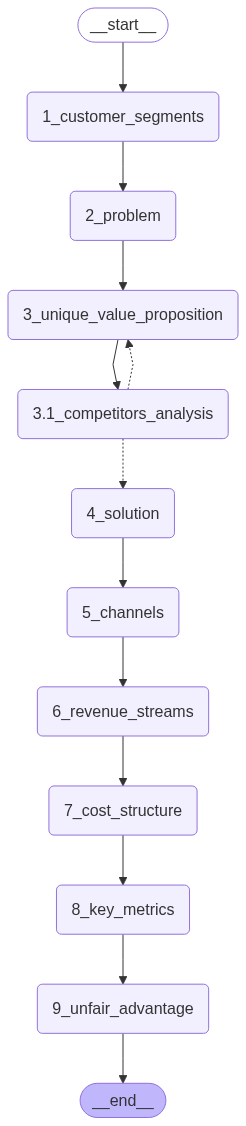

In [61]:
app

In [75]:
import uuid

inputs = {"main_task": "Онлайн платформа для изучения английского языка с AI-агентами"}
config = {"configurable": {"thread_id": str(uuid.uuid4())}}

async for event in app.astream(inputs, config=config):
  print(event)

{
    '1_customer_segments': {
        'customer_segments': 'Целевые клиенты — студенты, школьники, взрослые желающие изучать английский язык 
самостоятельно онлайн, используя интерактивное общение с искусственным интеллектом.'
    }
}

{
    '2_problem': {
        'problem': 'Решаем проблему отсутствия эффективного самостоятельного изучения разговорного английского 
через живое взаимодействие с виртуальными собеседниками.'
    }
}

{
    '3_unique_value_proposition': {
        'unique_value_proposition': 'Уникальное предложение: изучение разговорного английского через реалистичное 
живое общение с AI-агентами, имитирующими реальных людей разных культур и уровней владения языком.'
    }
}

TypeError: 'CompetitorsAnalysisResult' object is not subscriptable

In [41]:
app.get_state(config=config).values
current_state_values = app.get_state(config=config).values
state = LeanGraphState(**current_state_values)
print(state)

{
    'main_task': 'Онлайн-платформы изучения языков, которая связывает изучающих язык с носителями языка.',
    'competitors_analysis': 'Предложение уникальное!!!',
    'problem': 'Проблема заключается в недостатке практики общения с носителями языка и отсутствии удобных платформ
для эффективного взаимодействия между изучающими иностранный язык и носителями этого языка.',
    'solution': 'Решение — создание онлайн-платформы, объединяющей изучающих языки с носителями для живого общения,
с удобным интерфейсом и возможностью дополнительного дохода для носителей.',
    'key_metrics': 'Ключевые показатели: количество активных пользователей, среднее время сессии, конверсия новых 
пользователей в постоянных, средняя выручка с одного носителя языка, коэффициент удержания пользователей, LTV/CAC 
соотношение.',
    'unique_value_proposition': 'Уникальное предложение — онлайн-платформа для изучения языков через живое общение 
с носителями языка, предоставляющая удобный интерфейс и возможность заработка для носителей.',
    'unfair_advantage': 'Наше конкурентное преимущество — уникальная платформа, обеспечивающая удобное 
взаимодействие изучающих языки с носителями и предлагающая последним дополнительный заработок.',
    'channels': 'Каналы привлечения клиентов: SEO-продвижение, таргетированная реклама в соцсетях, партнерские 
программы с языковыми школами и блогерами, рекомендации пользователей.',
    'customer_segments': 'Целевые клиенты — изучающие иностранные языки и носители языка, желающие практиковать 
общение и зарабатывать на своем знании родного языка.',
    'cost_structure': 'Структура затрат включает разработку и поддержку платформы, маркетинговые расходы (SEO, 
таргетинг), комиссионные выплаты носителям языка, оплату серверов и инфраструктуры, зарплаты сотрудников поддержки 
и разработки.',
    'revenue_streams': 'Зарабатывать планируем за счет комиссии от каждого занятия, взимаемой с носителей языка, а 
также предоставления премиум-функций платной подписки для учащихся.'
}

# Вывод результата

In [27]:
from IPython.display import HTML, display


def show_lean_canvas(state: LeanGraphState) -> None:
    """Отрисовывает Lean Canvas в Jupyter-ноутбуке как HTML-сетку."""
    # --- CSS для сетки 5×2 + нижний ряд -----------------------------------
    css = """
    <style>
    .canvas {
        display: grid;
        grid-template-columns: 2fr 1fr 2fr 1fr 2fr;   /* ширины колонок */
        grid-template-rows: auto auto auto;           /* 2 ряда + низ   */
        gap: 8px;
        background: transparent;
        font-family: Arial, sans-serif;
    }
    .box {
        background:#e59a12;
        color:#fff;
        border:1px solid #fff;
        padding:12px 14px;
        line-height:1.3;
    }
    .title { font-weight:700; margin-bottom:6px; }
    /* раскладка по «ячейкам» */
    .problem           { grid-area: 1 / 1 / span 2 / span 1; }
    .solution          { grid-area: 1 / 2 / span 1 / span 1; }
    .key_metrics       { grid-area: 2 / 2 / span 1 / span 1; }
    .uvp               { grid-area: 1 / 3 / span 2 / span 1; }
    .unfair            { grid-area: 1 / 4 / span 1 / span 1; }
    .channels          { grid-area: 2 / 4 / span 1 / span 1; }
    .customer_segments { grid-area: 1 / 5 / span 2 / span 1; }
    .cost_structure    { grid-area: 3 / 1 / span 1 / span 3; }
    .revenue_streams   { grid-area: 3 / 4 / span 1 / span 2; }
    </style>
    """

    # --- HTML-разметка ------------------------------------------------------
    html = f"""
    {css}
    <h2 style="text-align:center;color:#08c;font-family:Arial;margin-top:4px;">
        {state['main_task']}
    </h2>

    <div class="canvas">

        <div class="box problem">
            <div class="title">2. Problem</div>
            {state['problem']}
        </div>

        <div class="box solution">
            <div class="title">4. Solution</div>
            {state['solution']}
        </div>

        <div class="box key_metrics">
            <div class="title">8. Key Metrics</div>
            {state['key_metrics']}
        </div>

        <div class="box uvp">
            <div class="title">3. Unique Value Proposition</div>
            {state['unique_value_proposition']}
        </div>

        <div class="box unfair">
            <div class="title">9. Unfair Advantage</div>
            {state['unfair_advantage']}
        </div>

        <div class="box channels">
            <div class="title">5. Channels</div>
            {state['channels']}
        </div>

        <div class="box customer_segments">
            <div class="title">1. Customer Segments</div>
            {state['customer_segments']}
        </div>

        <div class="box cost_structure">
            <div class="title">7. Cost Structure</div>
            {state['cost_structure']}
        </div>

        <div class="box revenue_streams">
            <div class="title">6. Revenue Streams</div>
            {state['revenue_streams']}
        </div>

    </div>
    """
    display(HTML(html))


In [28]:
# show_lean_canvas(state)

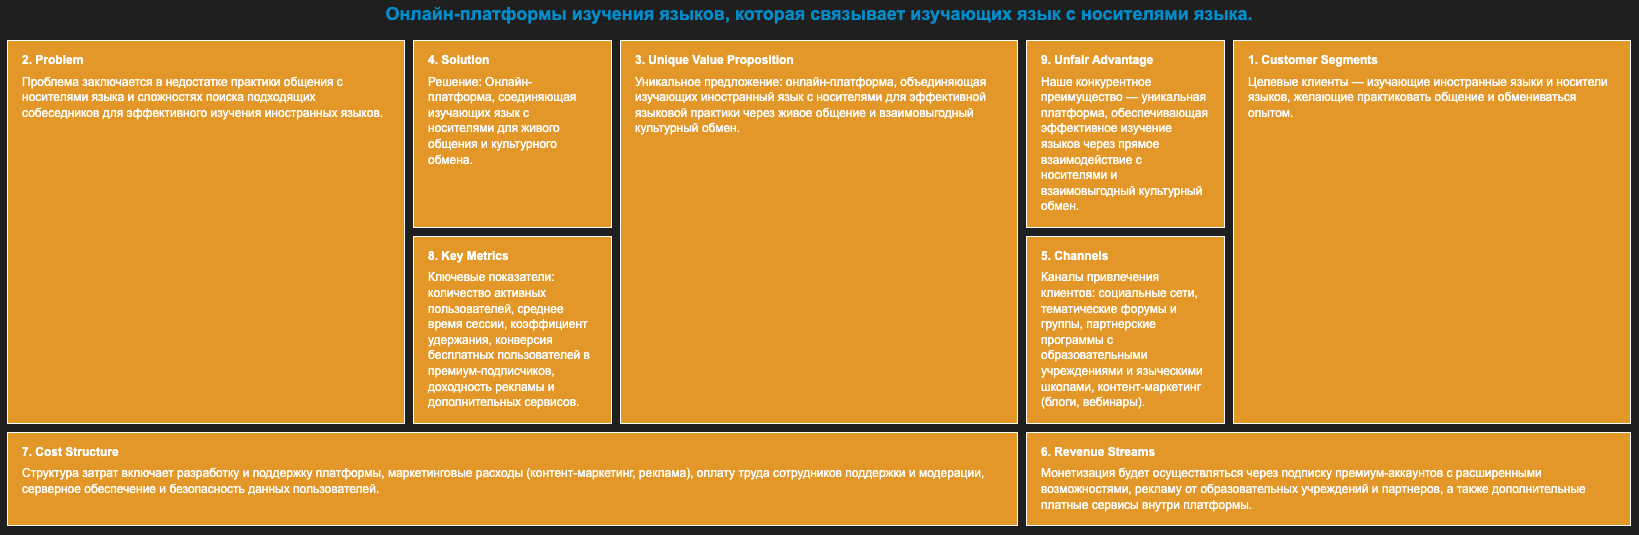